In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prolonged(slice):
    return slice.std() <= 30

def decision_tree(slice):
    if slice.max()>450:
        return 2

    if slice.mean() < 50:
        return 0
    
    if prolonged(slice):
        return 1
    

    else:
        return 0
    


In [3]:
def main(s):
    data_path = f'/Users/shiyuanduan/Documents/PainStudy/Pain_Data_w_Freq/{s}_Summary.csv'
    df = pd.read_csv(data_path)
    df['pain_score'] = df['itp_F0(Hz)'].rolling(30).apply(decision_tree)
    df_resample = df.rolling(10, step=10).max()
    fig, axs = plt.subplots(2, figsize=(20, 6))
    axs[0].scatter(df_resample.index, df_resample['itp_F0(Hz)'], marker='x', s=15)
    axs[0].set_title('Vocal Freq [Hz]')
    axs[1].plot(df_resample['pain_score'])
    axs[1].set_title('Pain Score')
    axs[-1].set_xlabel('Time [ms]', fontsize=16)
    fig.suptitle(f'Subject {s}', fontsize=16)

    output_folder = '/Users/shiyuanduan/Documents/PainStudy/Pain Score Result'
    fig.savefig(f'{output_folder}/Subject_{s}_Plot.png')
    plt.show()

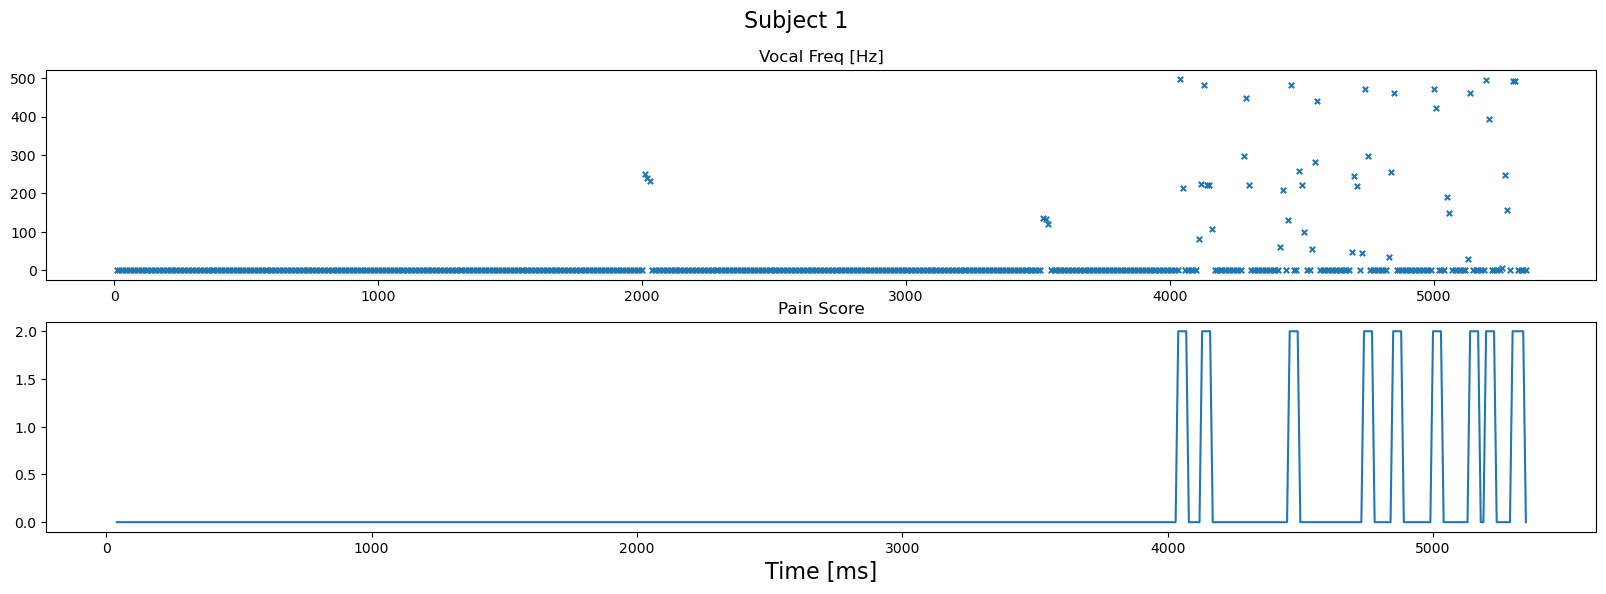

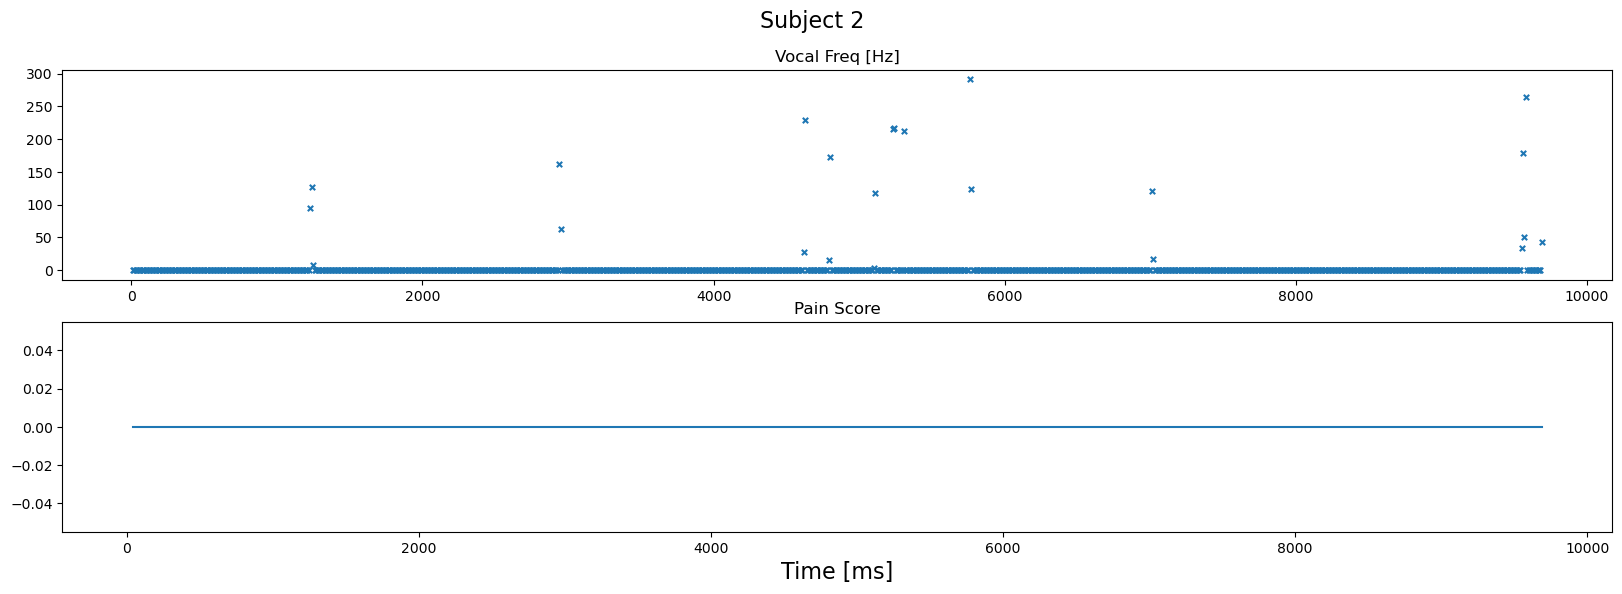

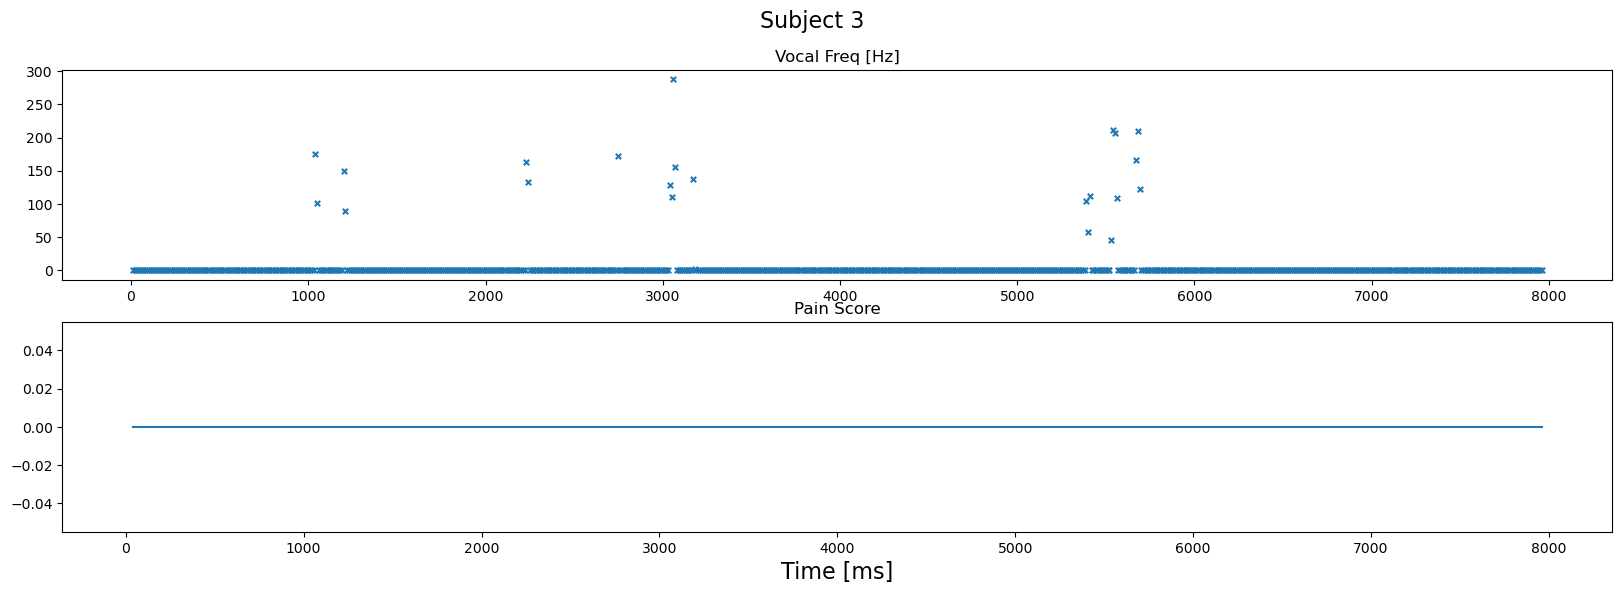

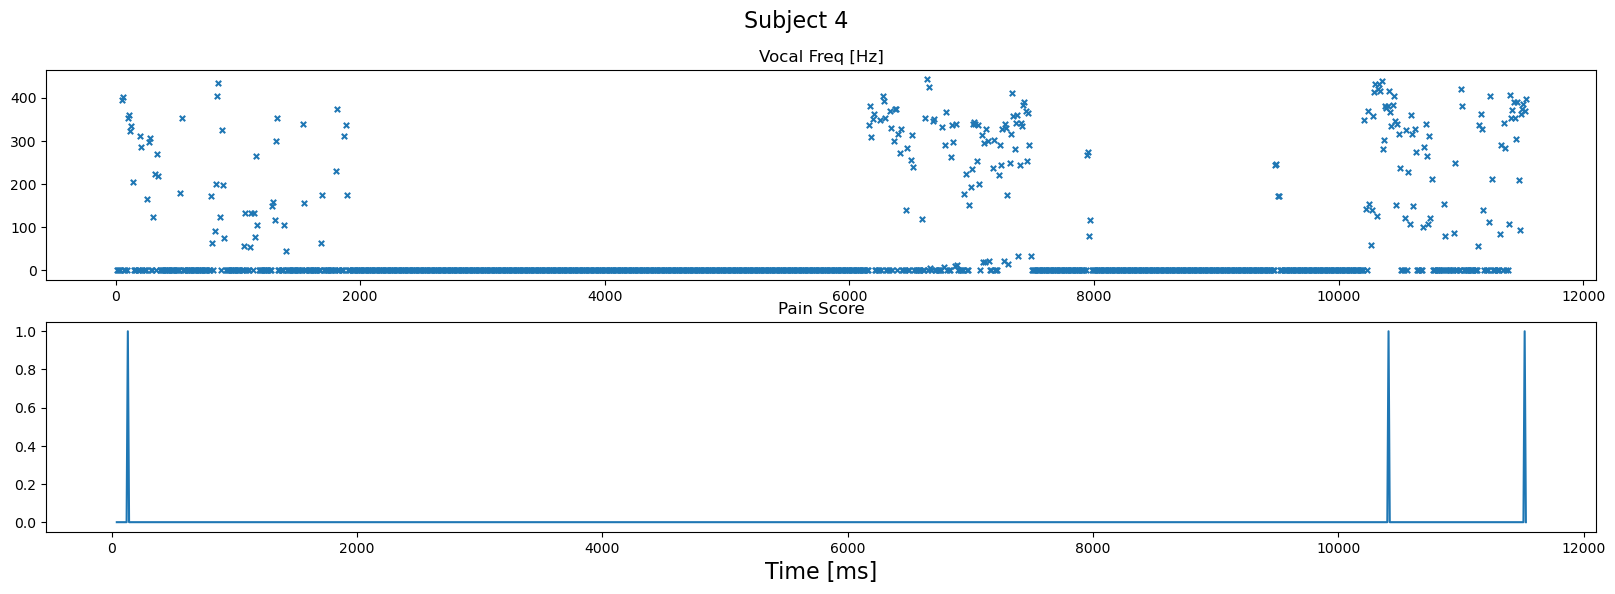

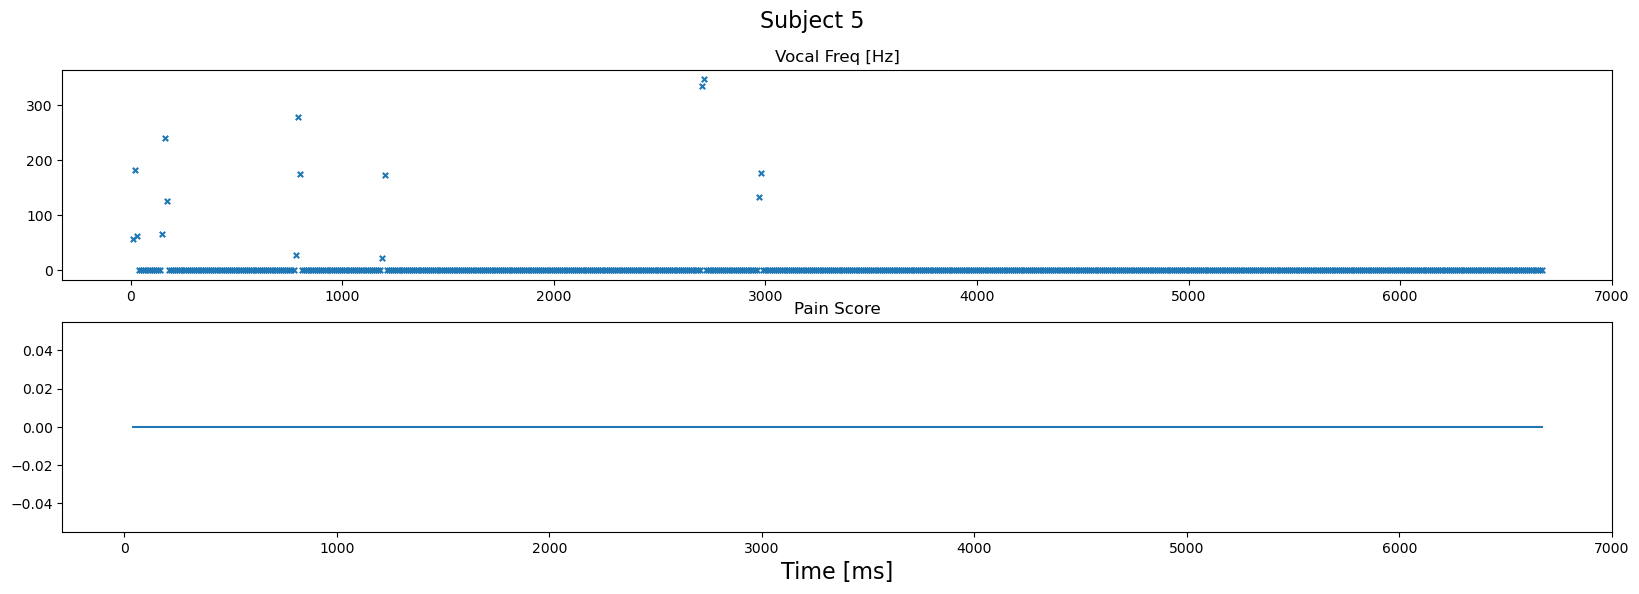

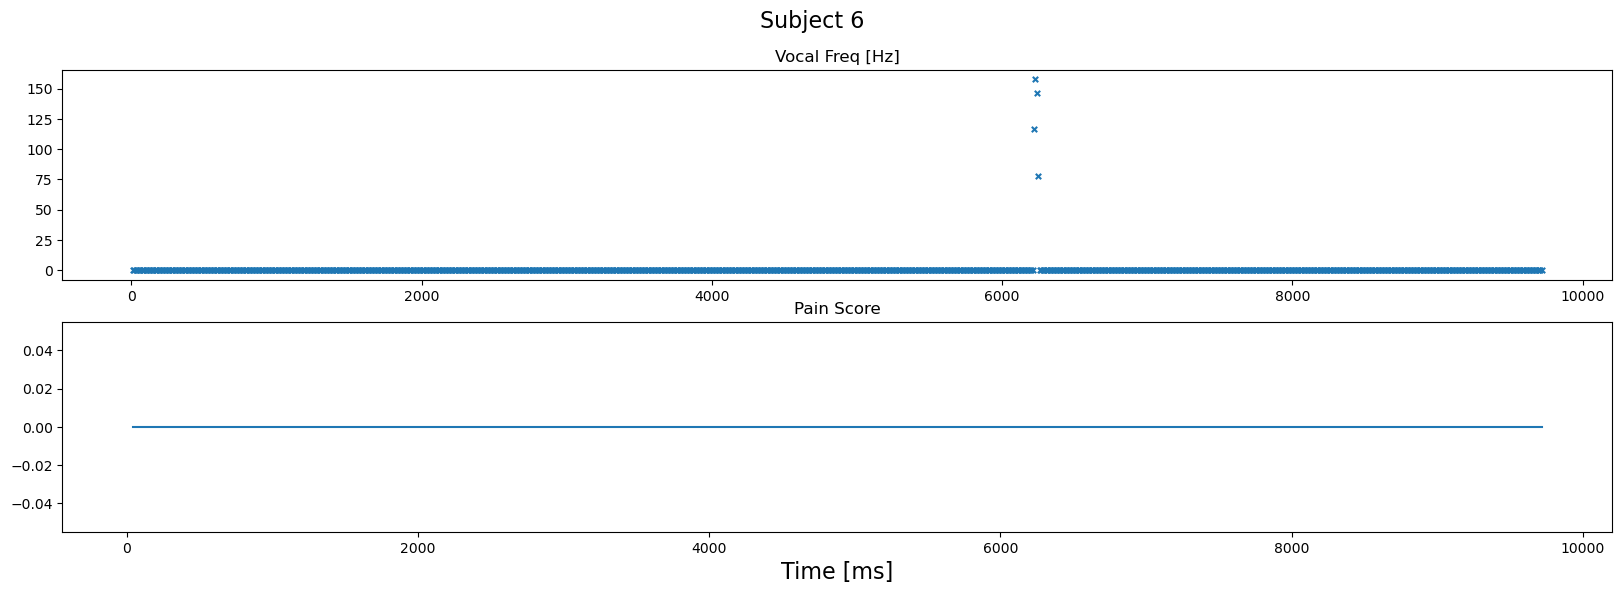

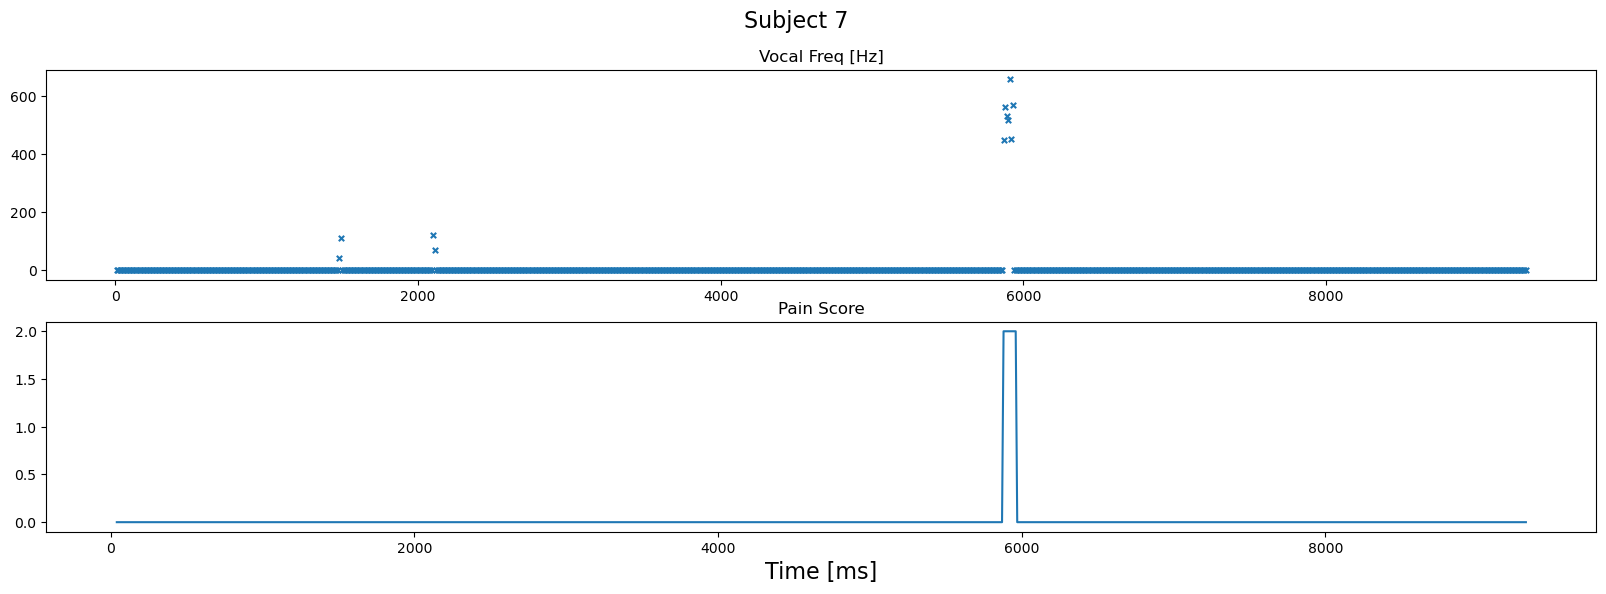

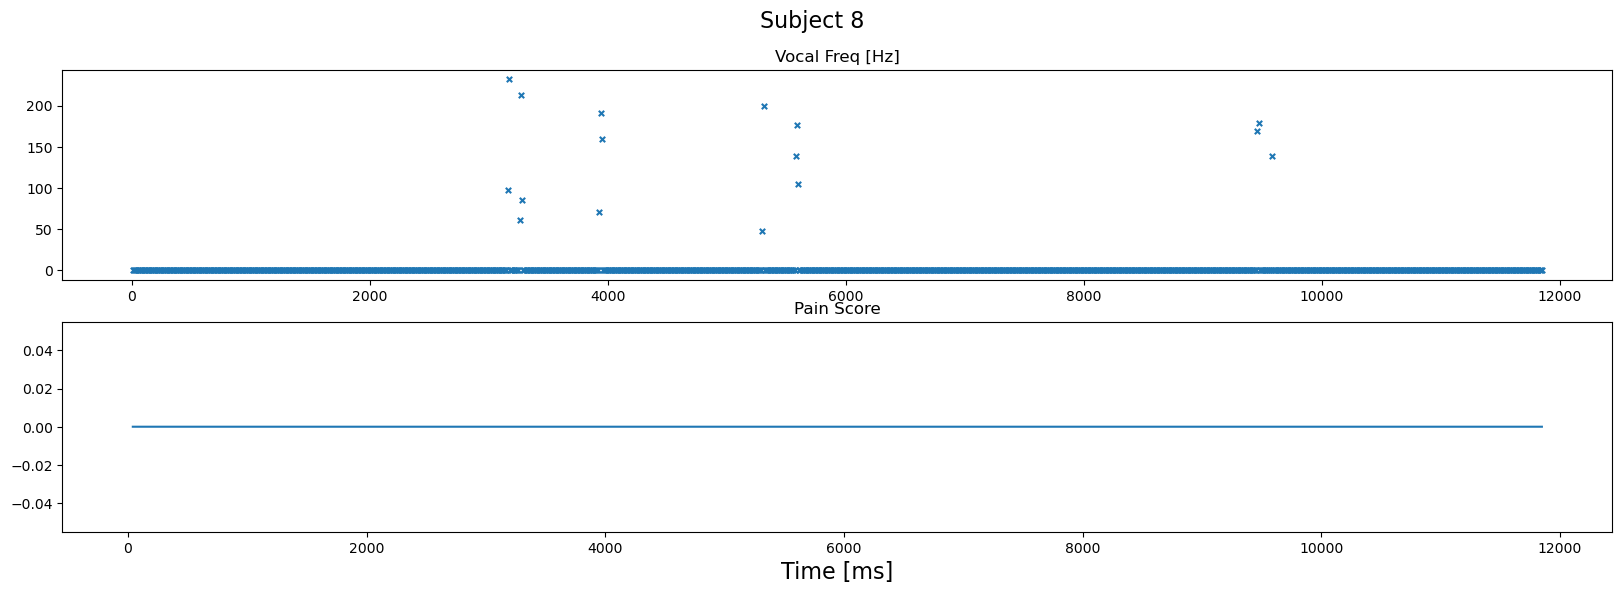

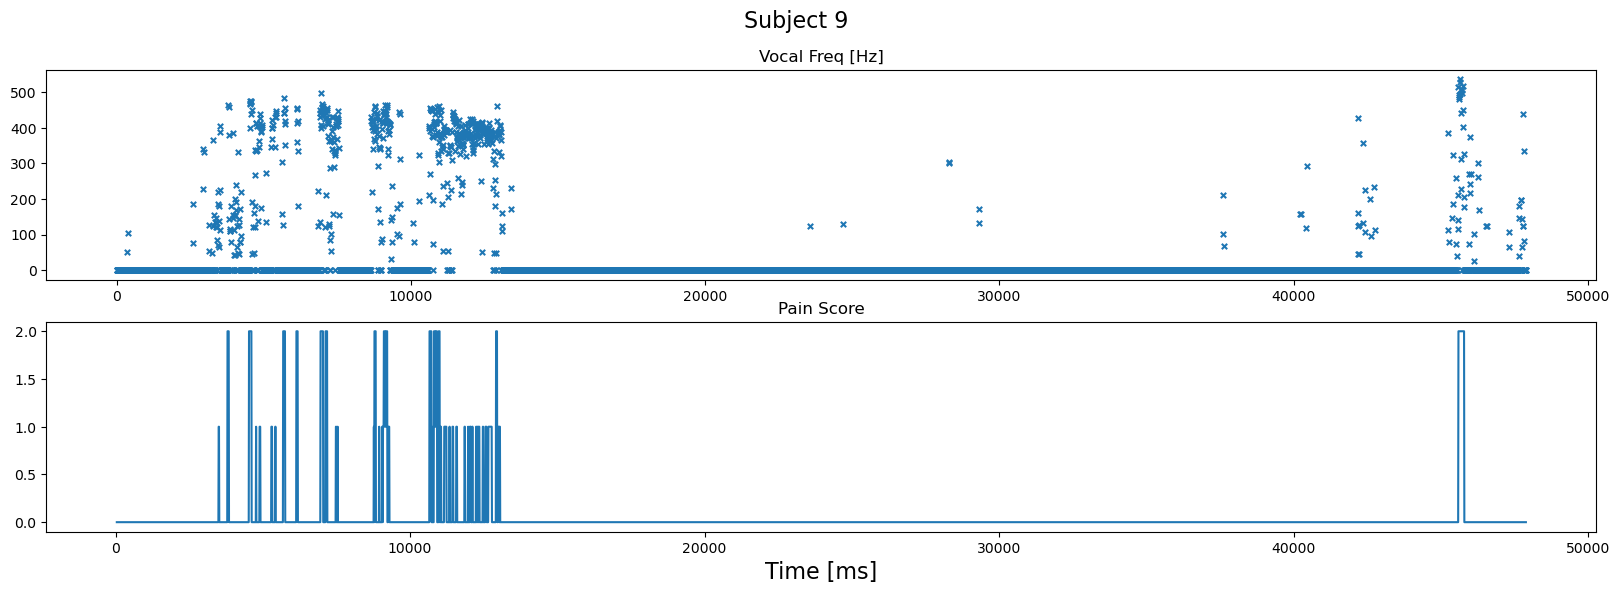

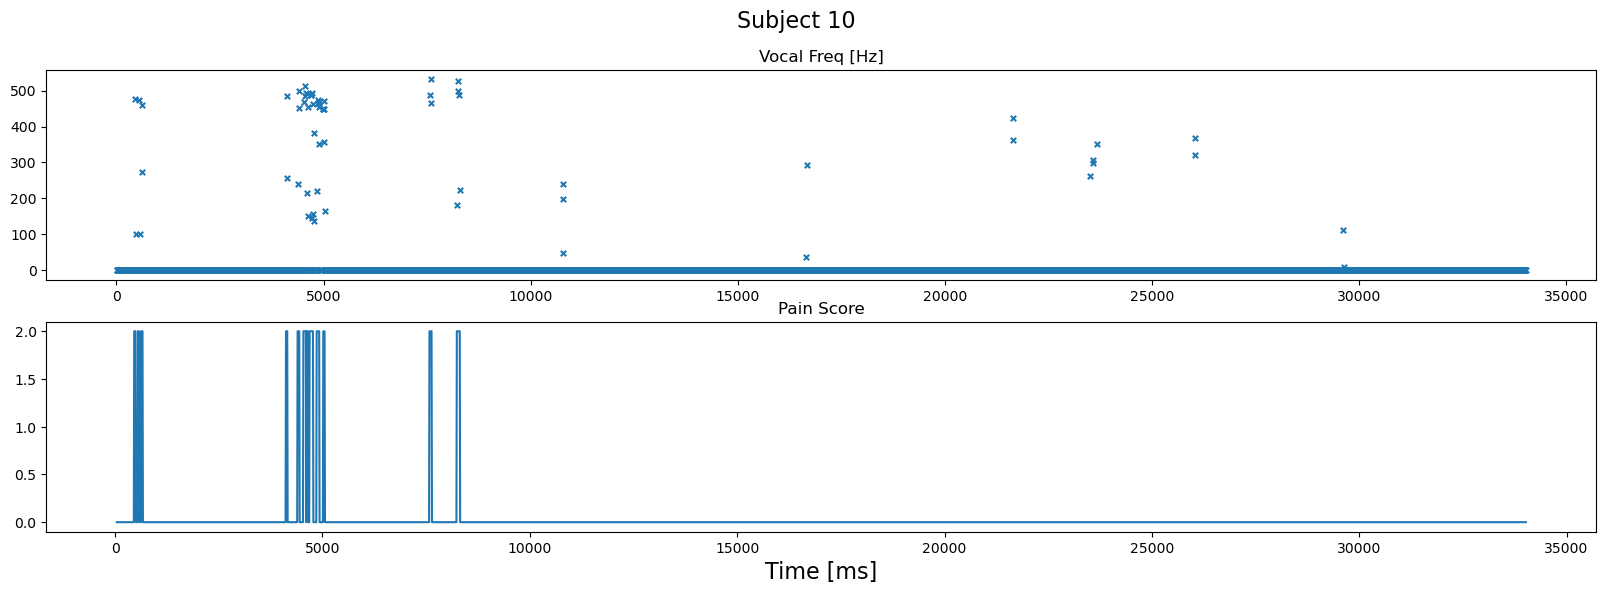

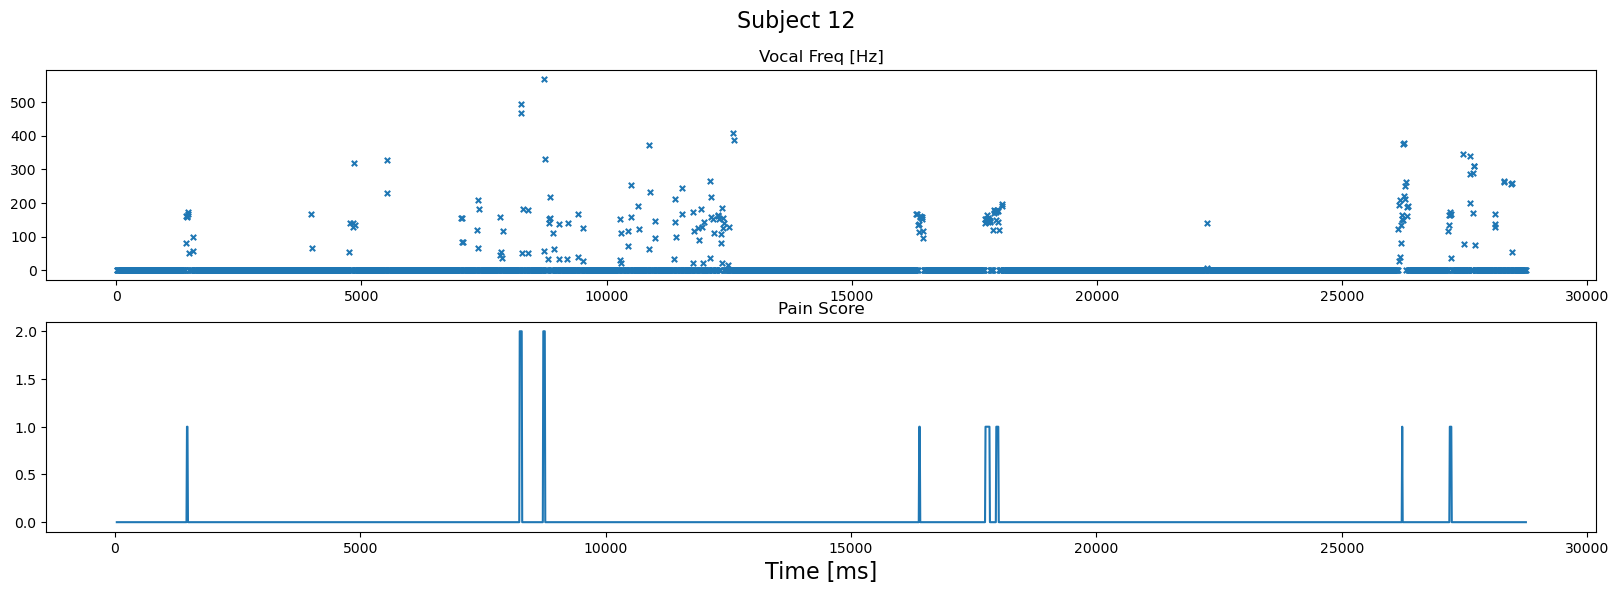

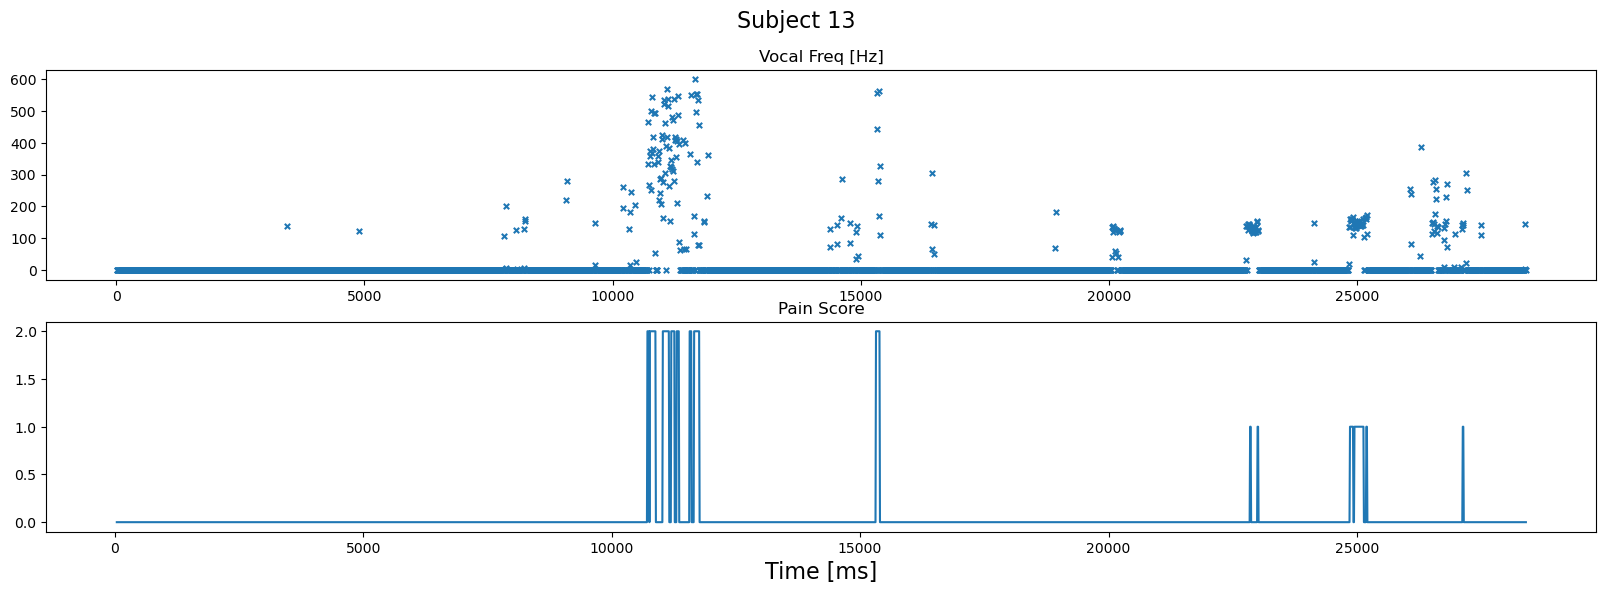

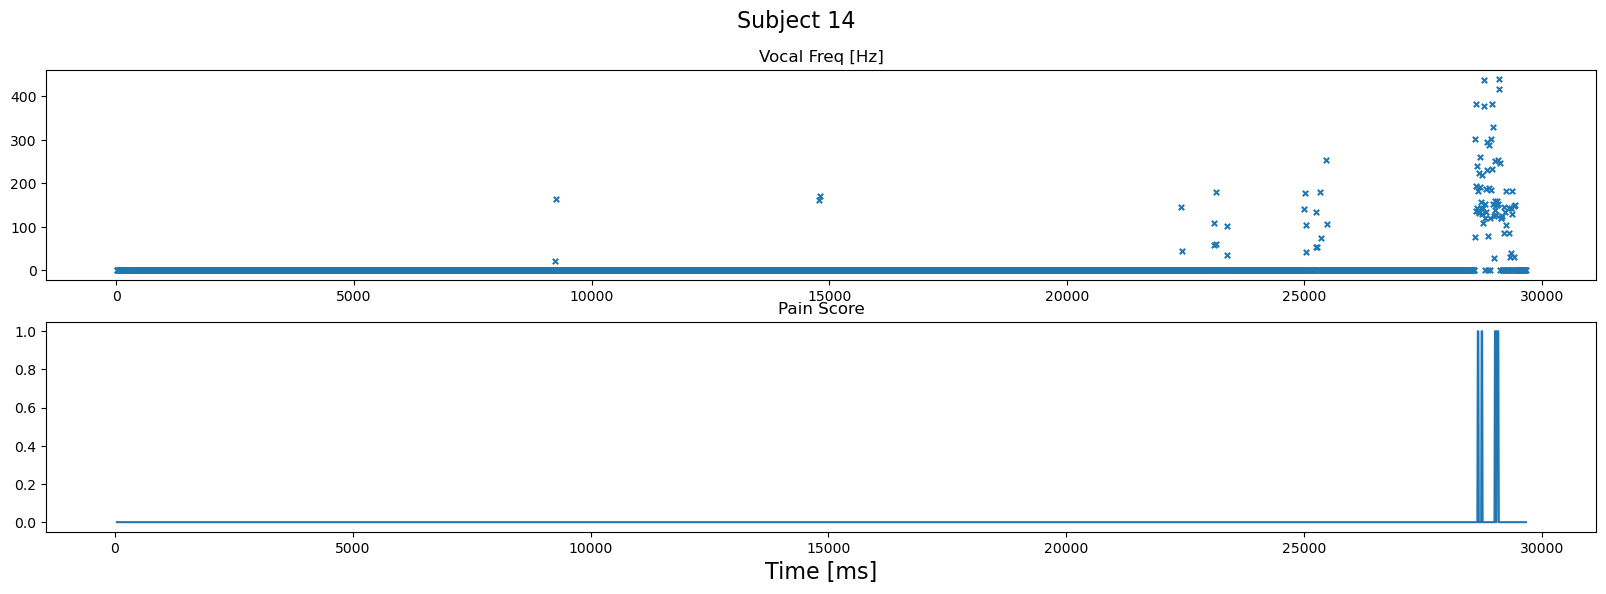

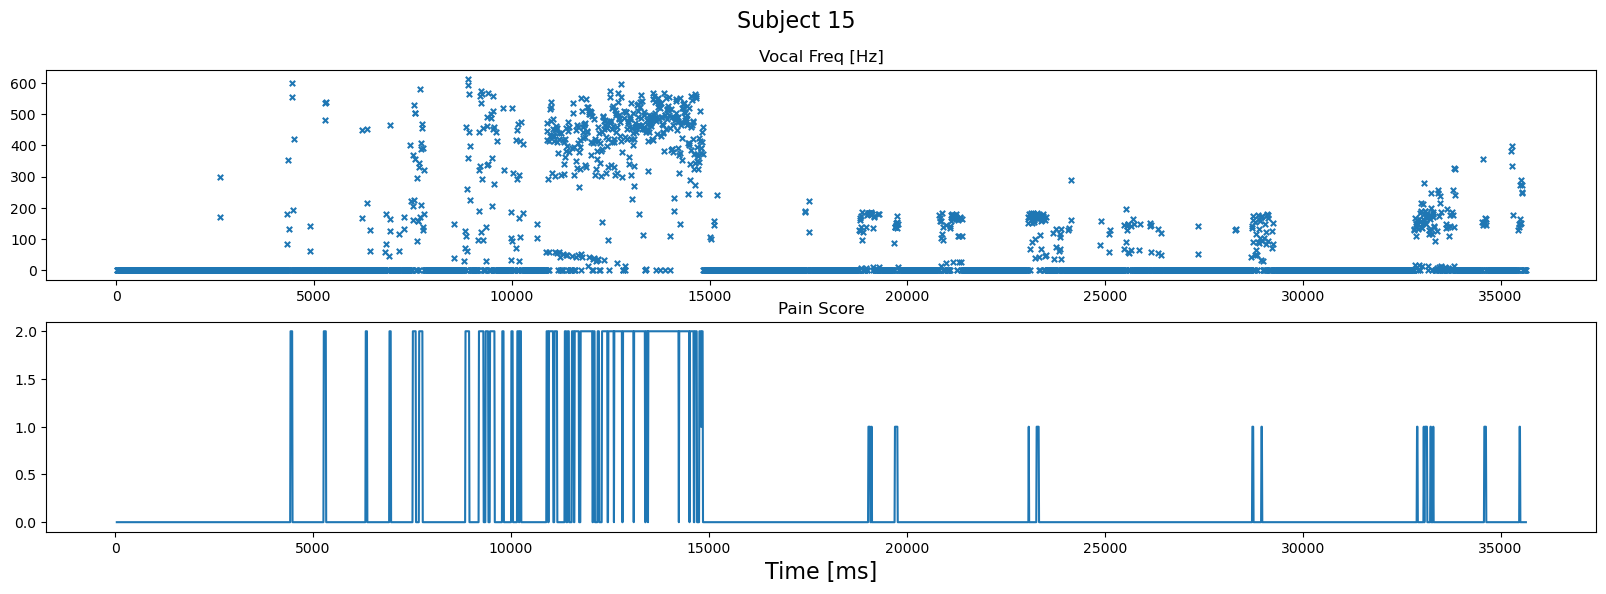

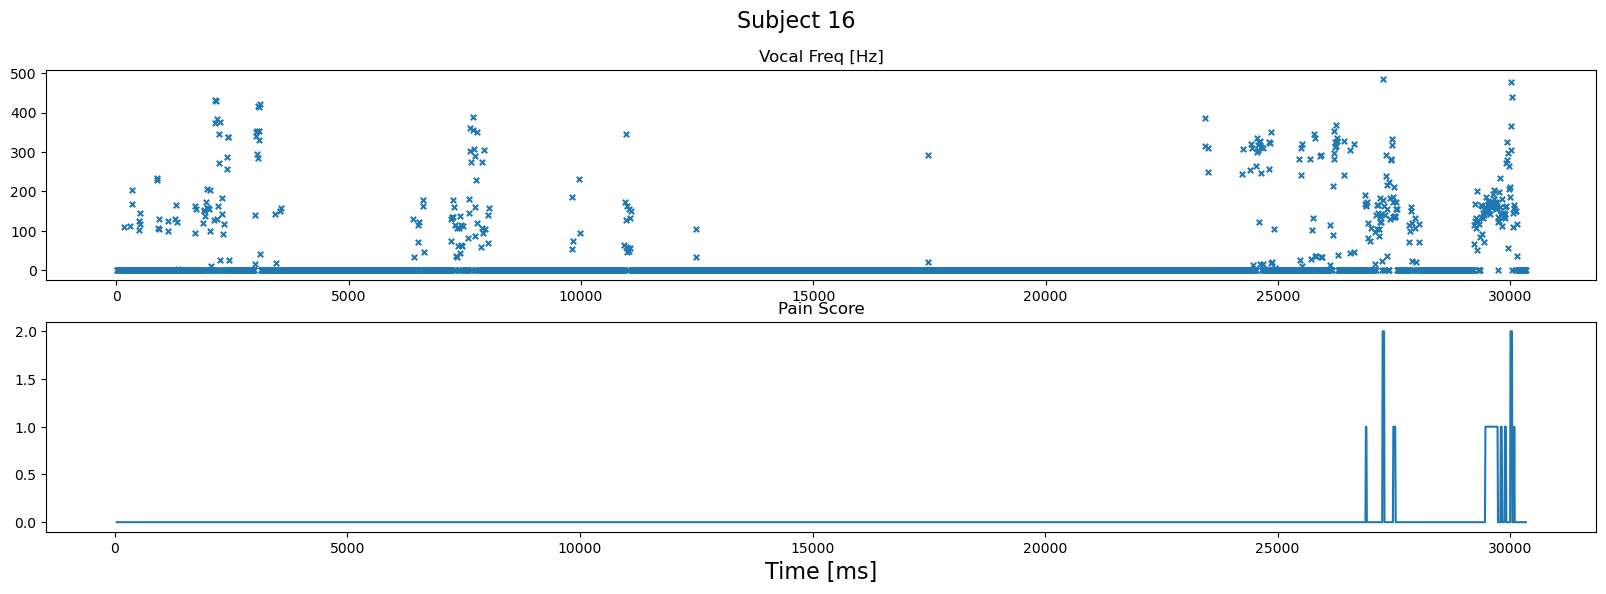

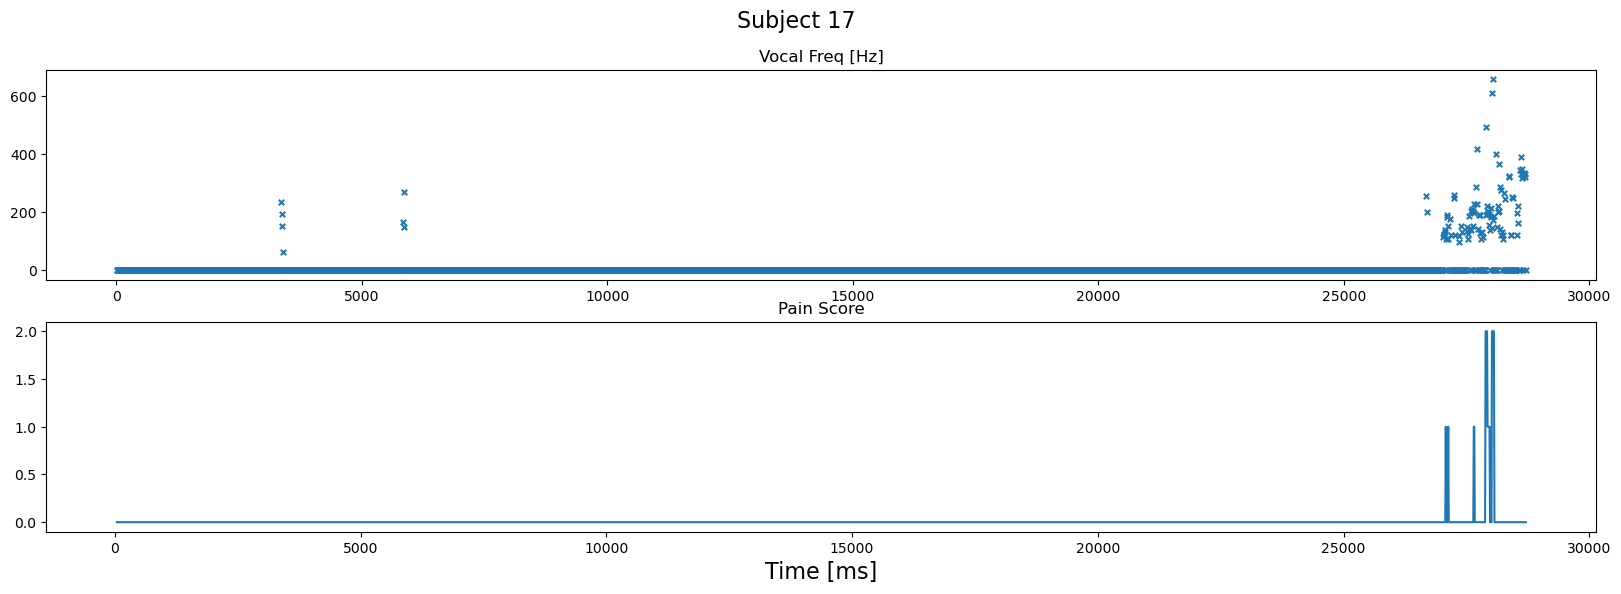

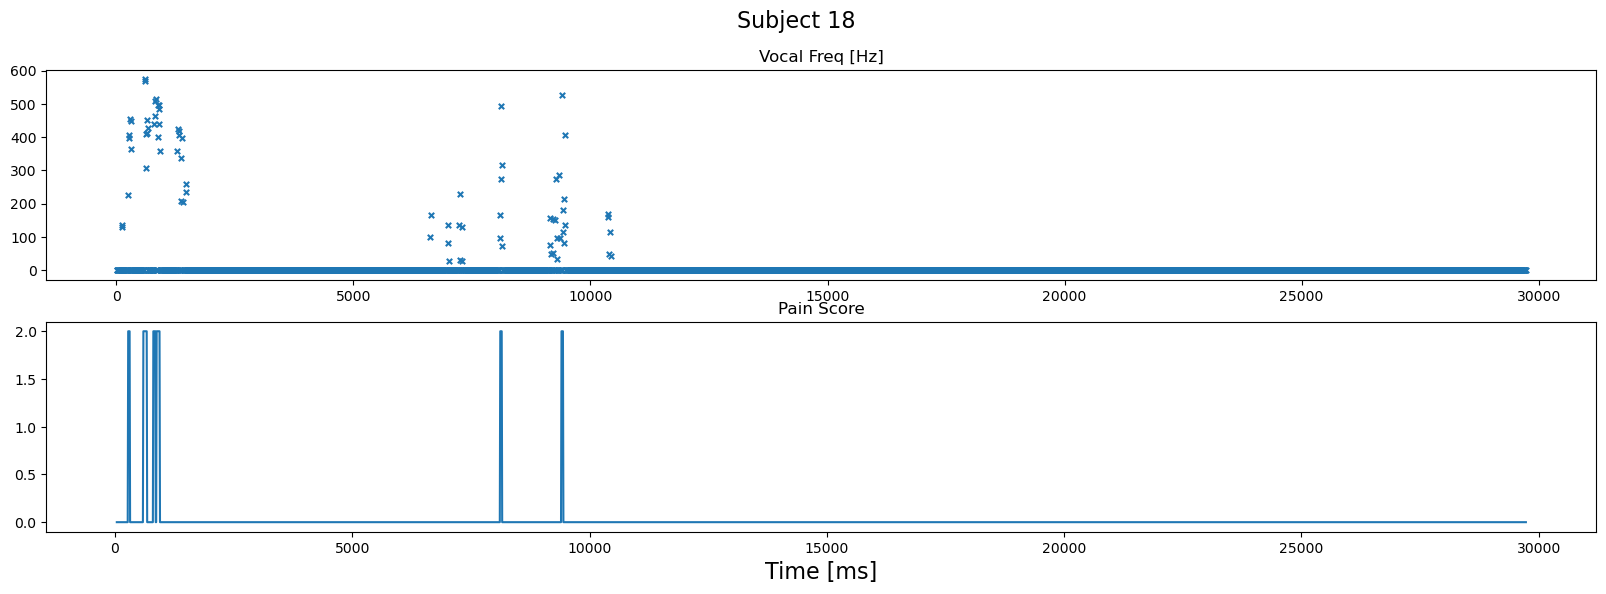

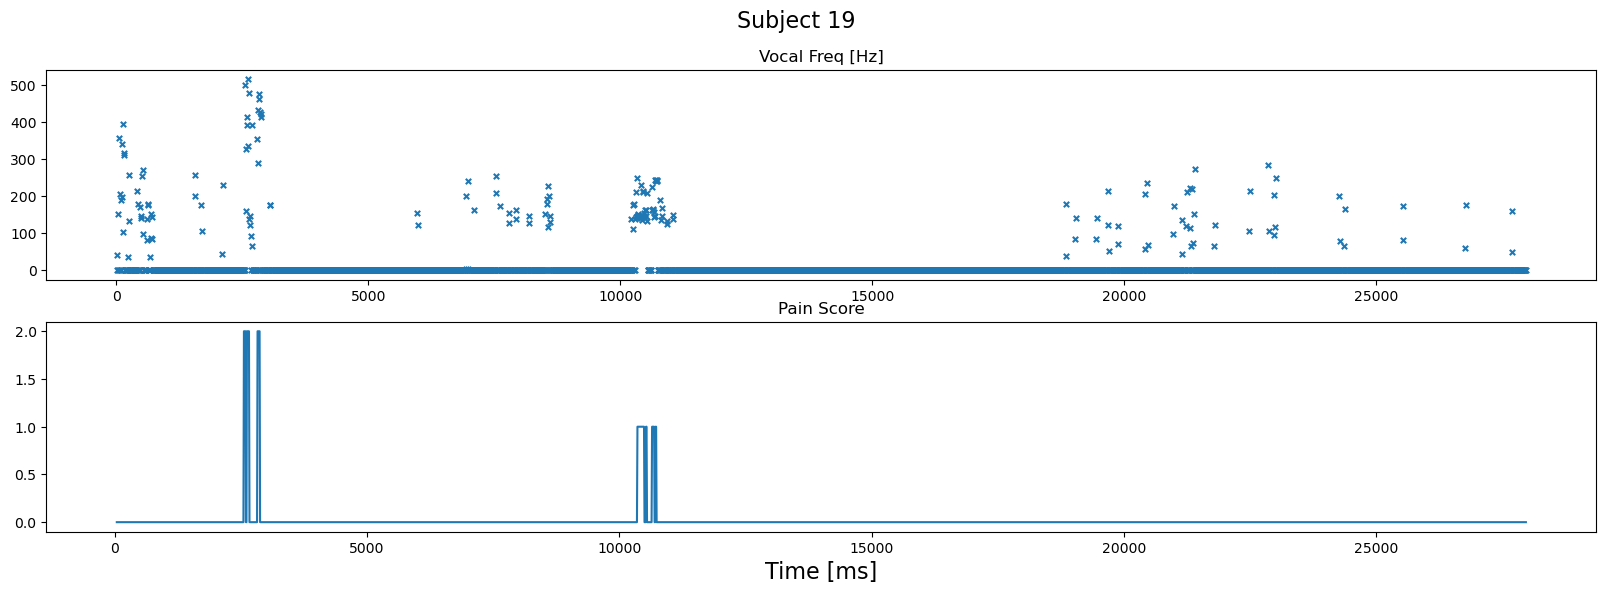

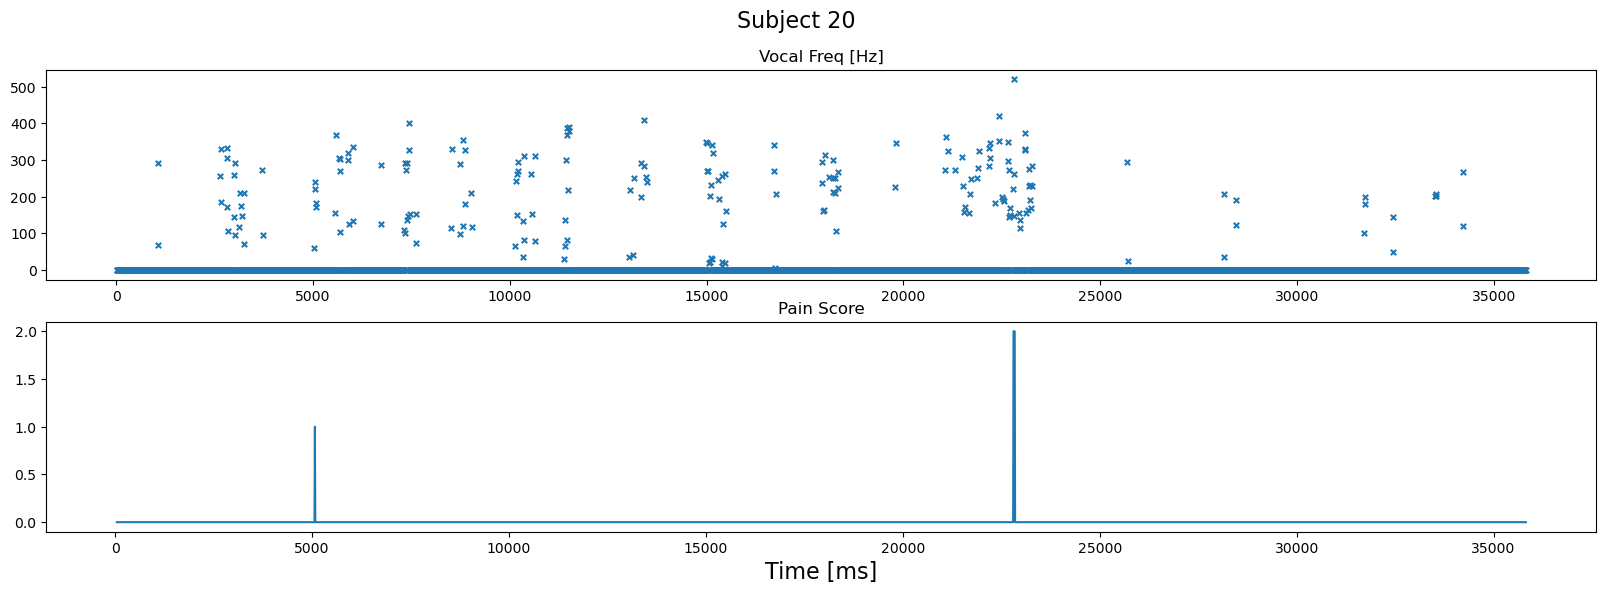

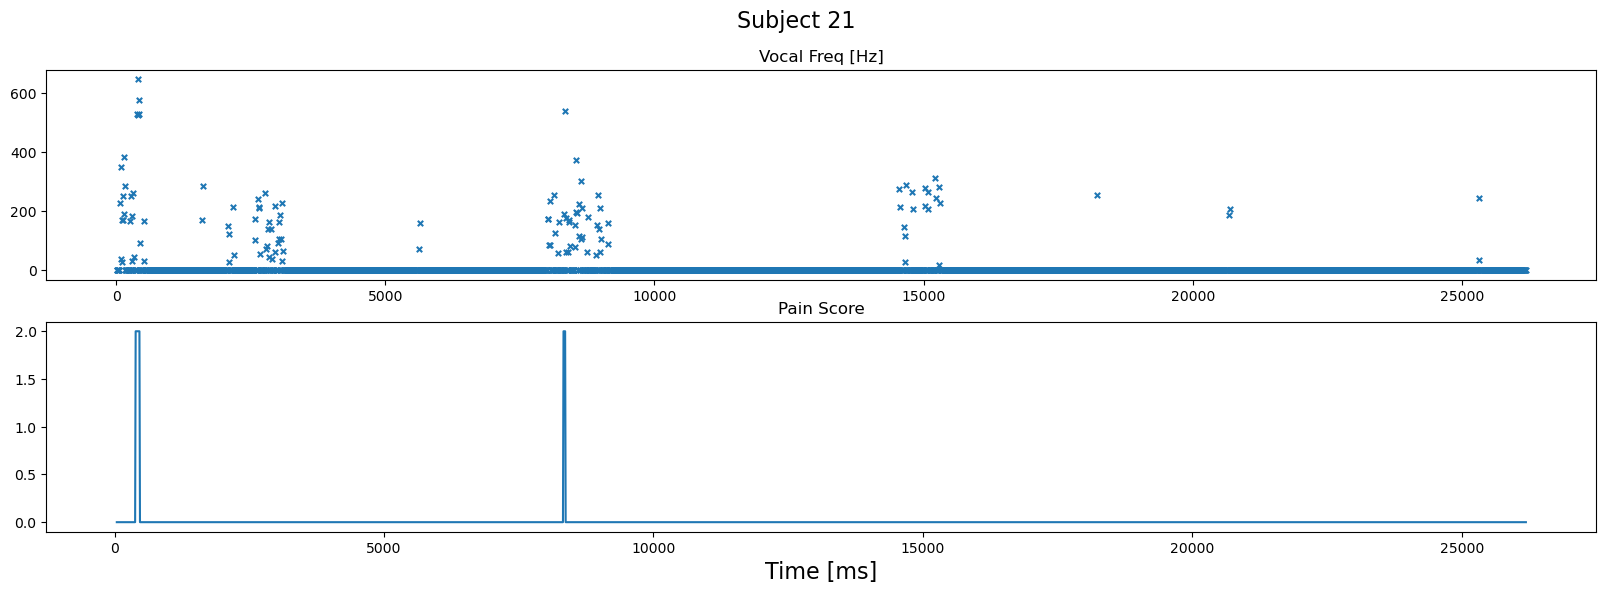

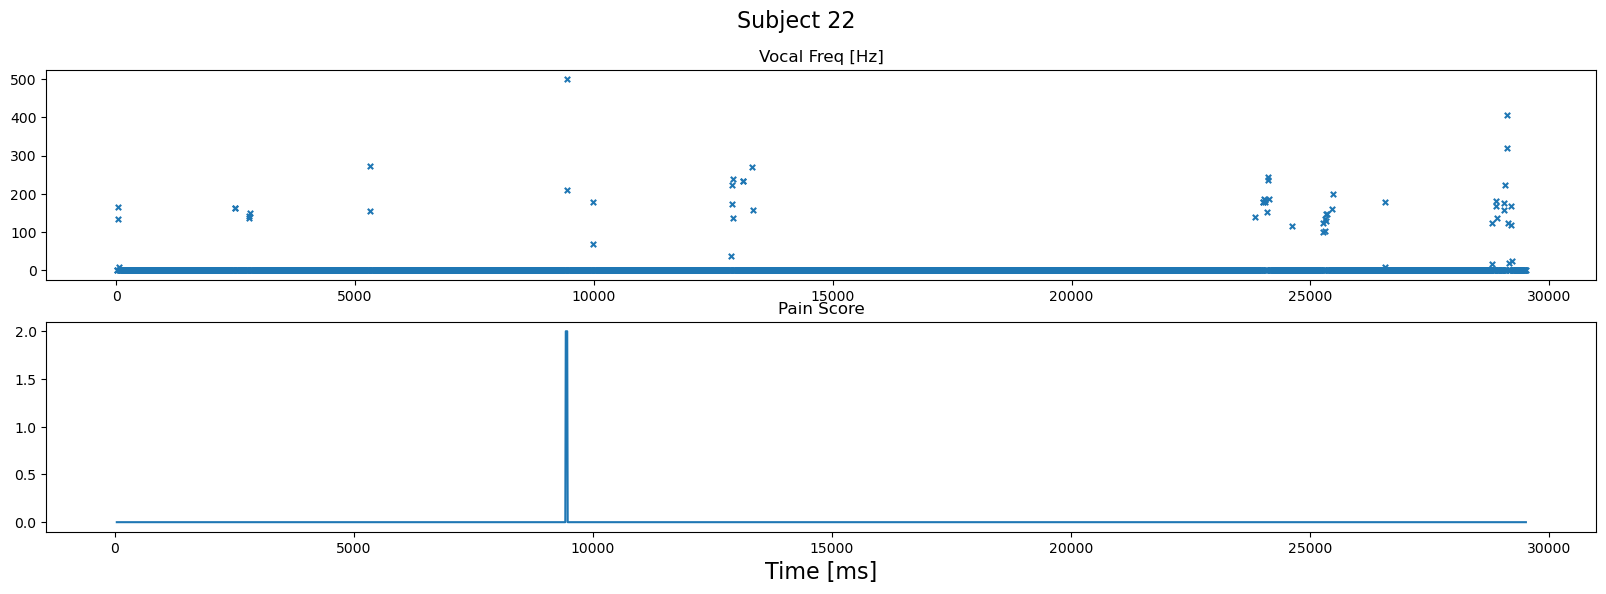

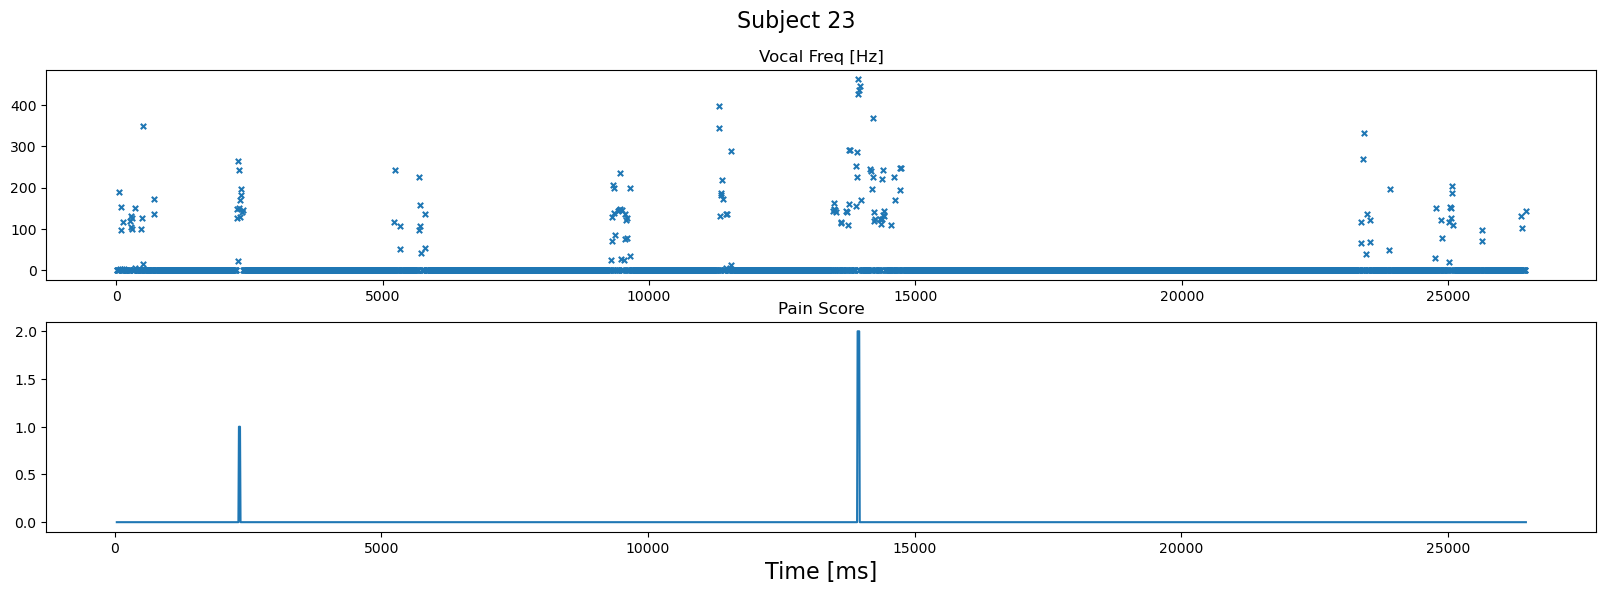

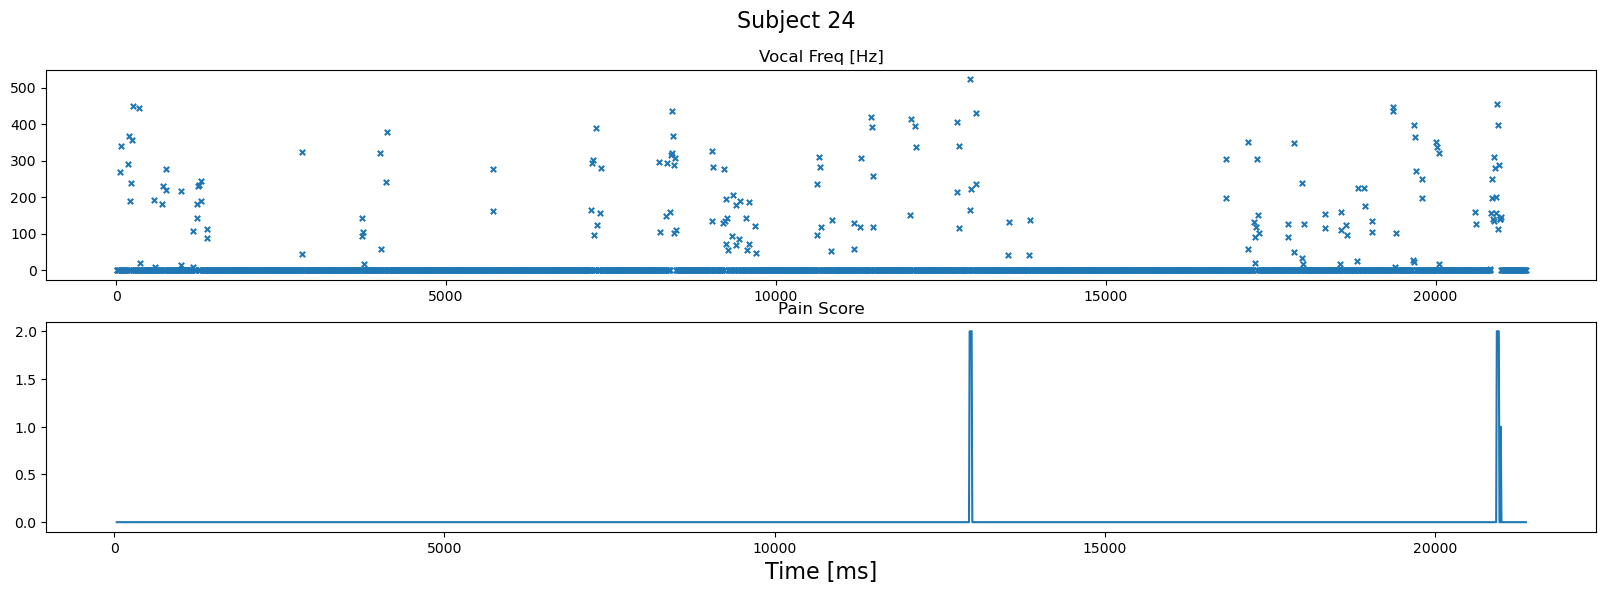

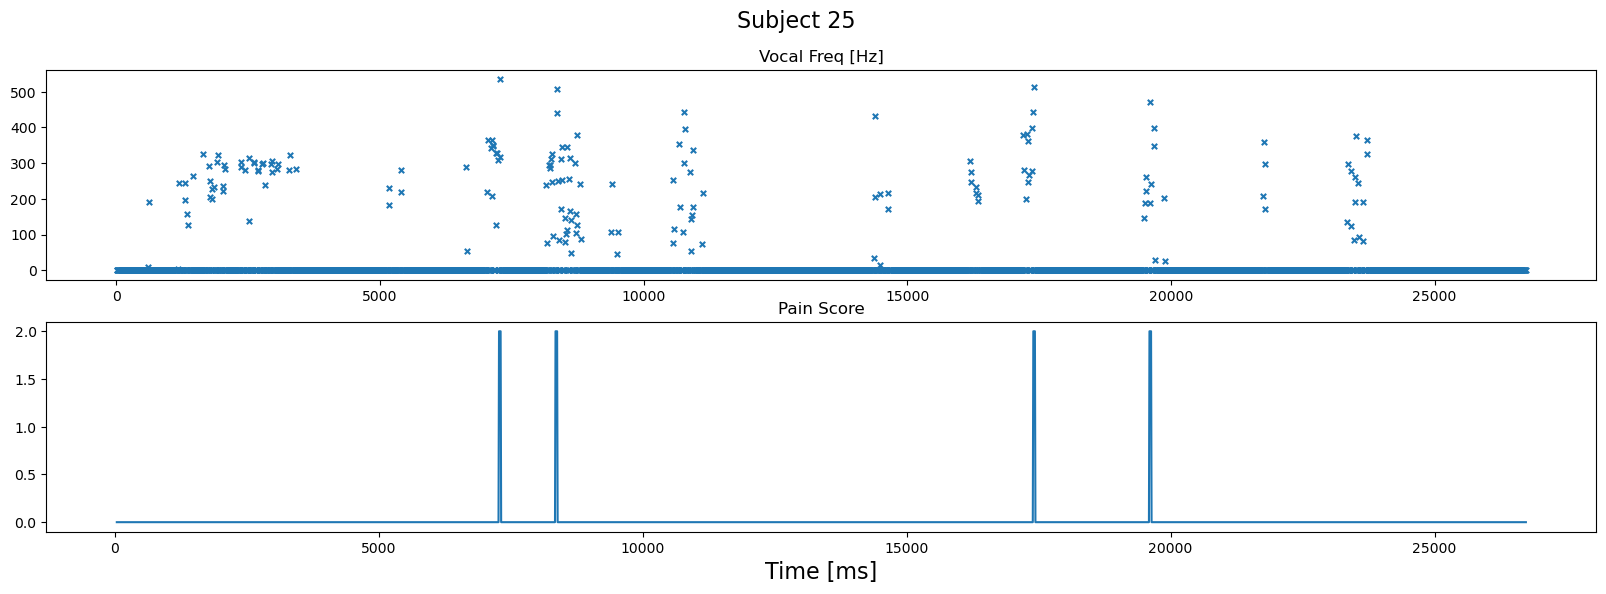

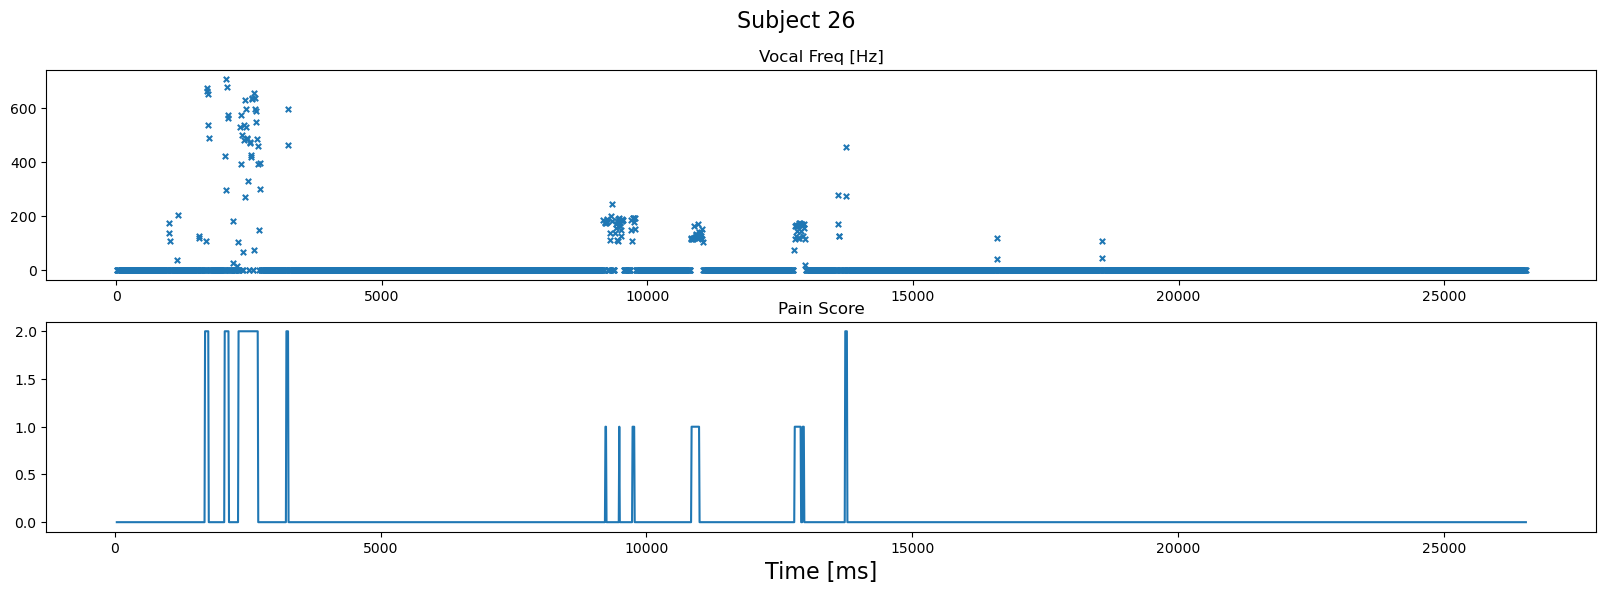

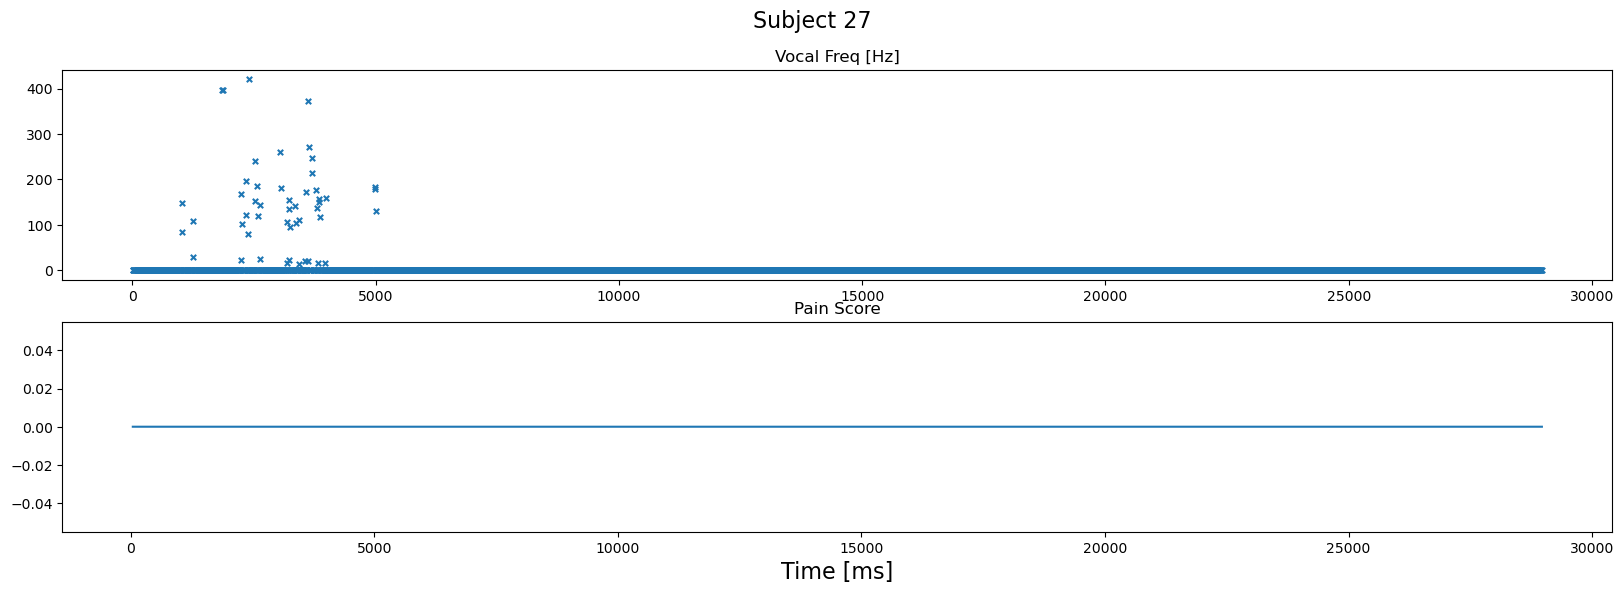

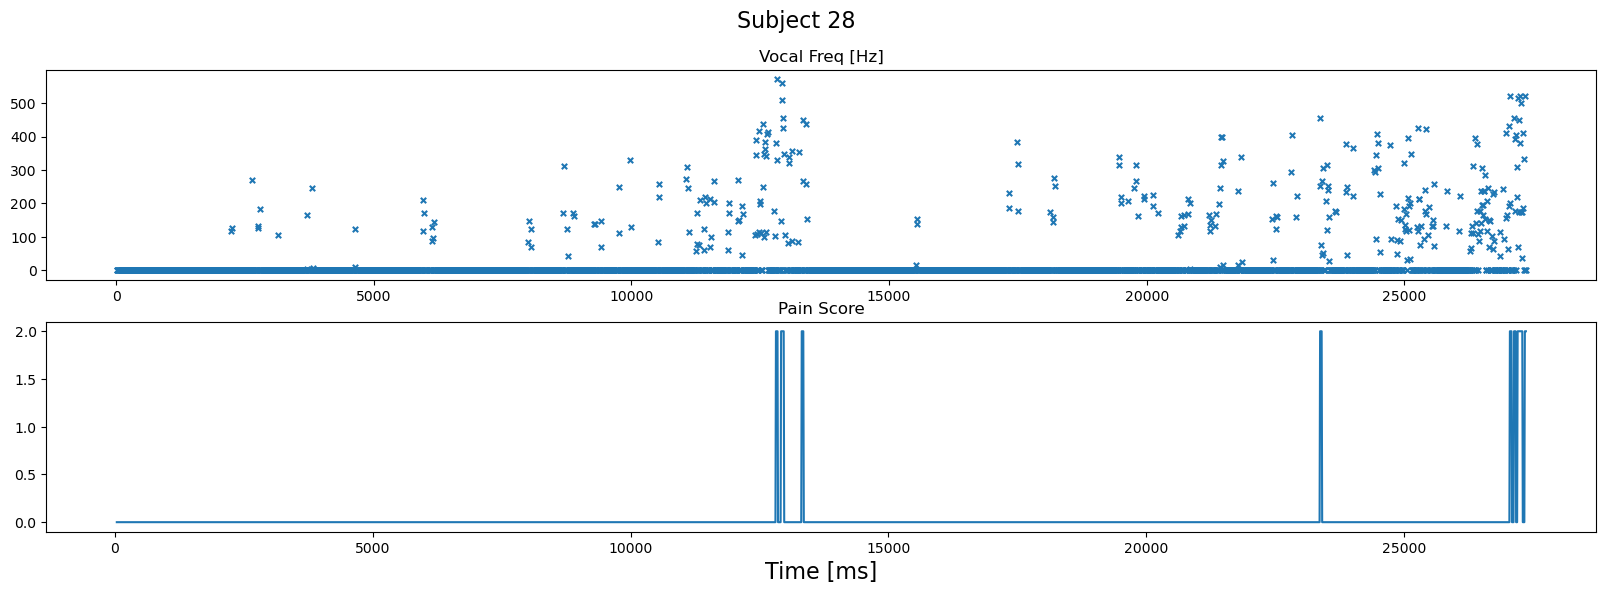

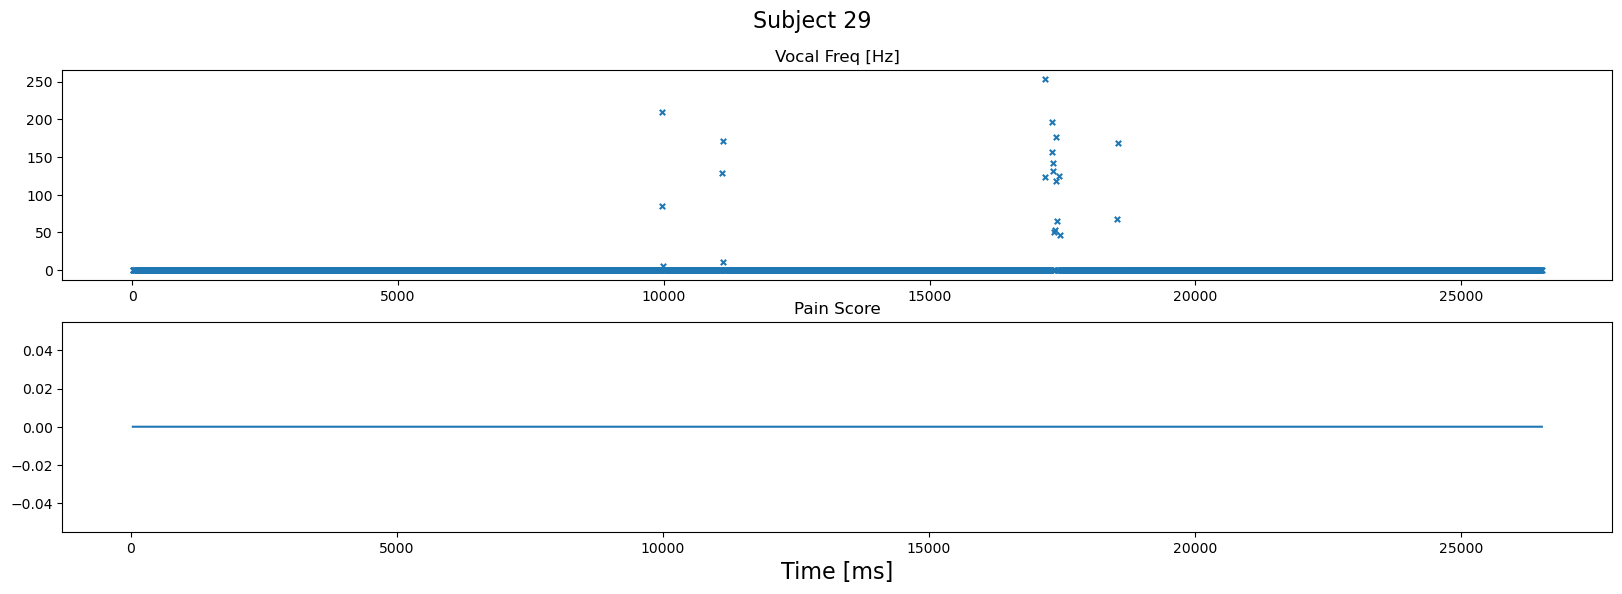

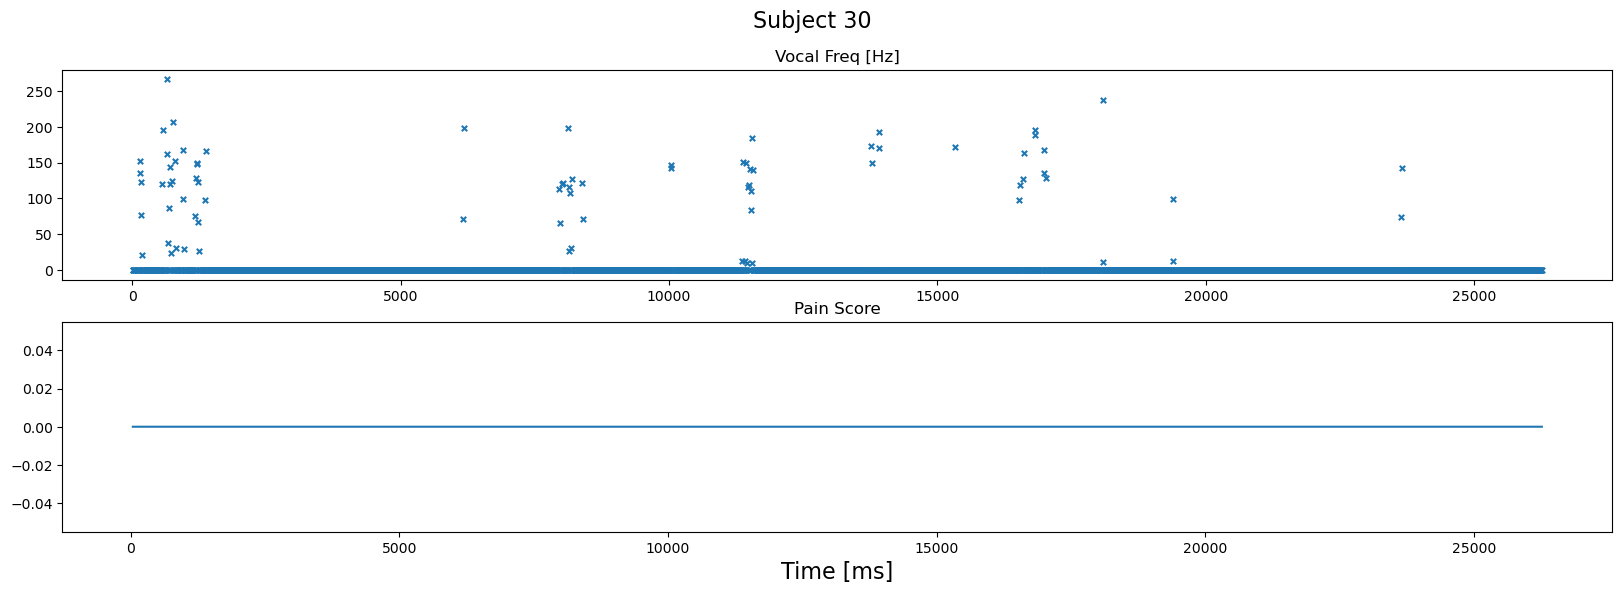

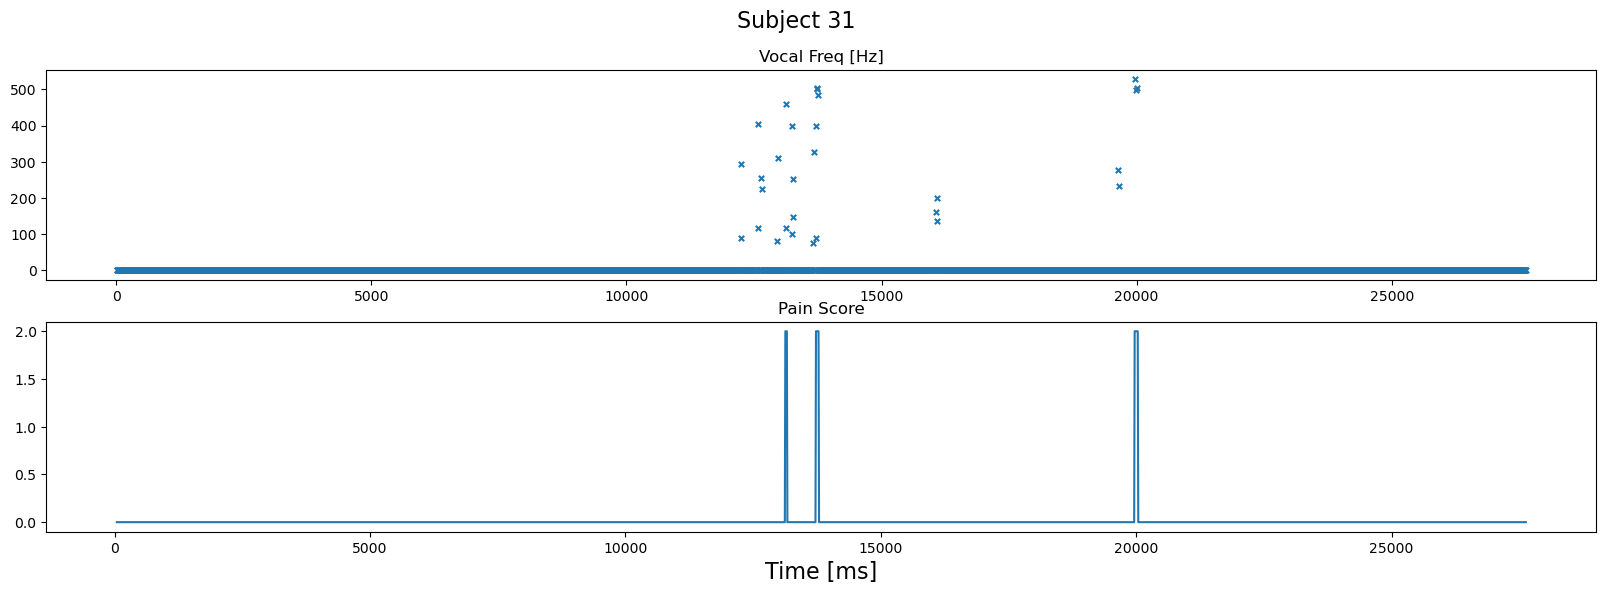

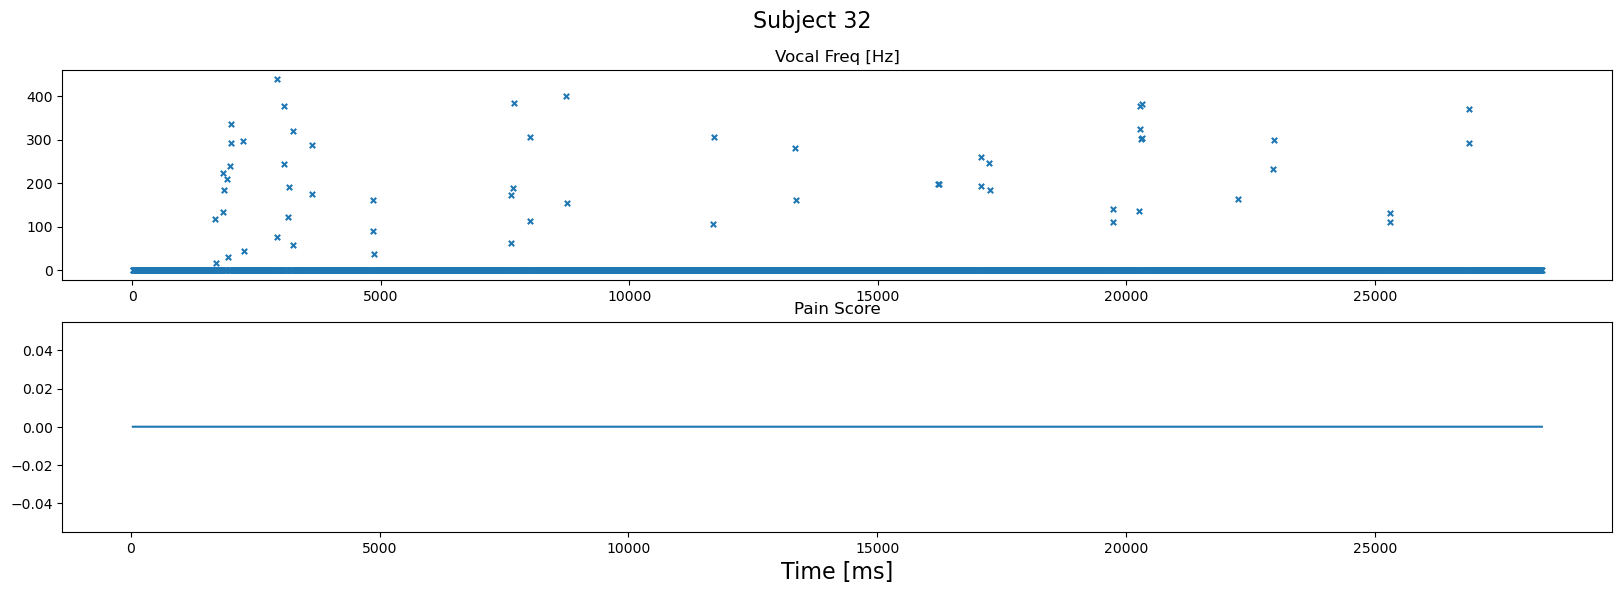

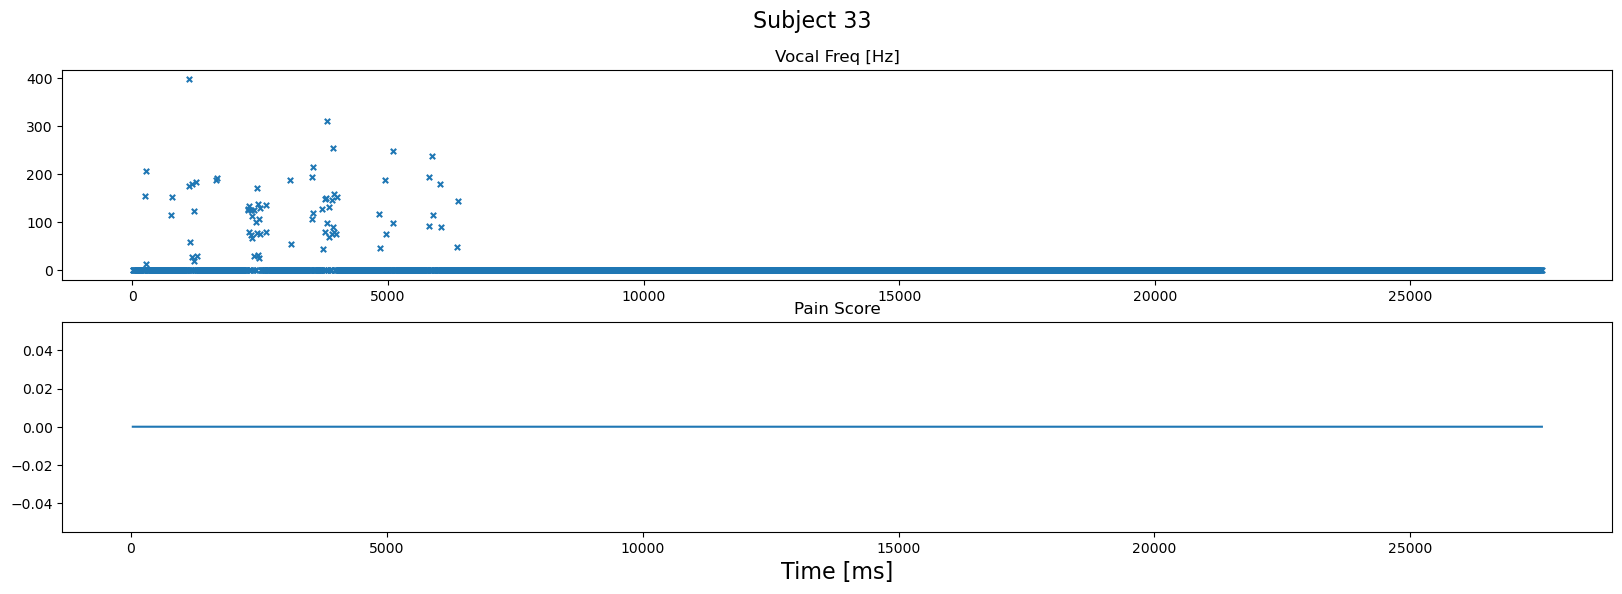

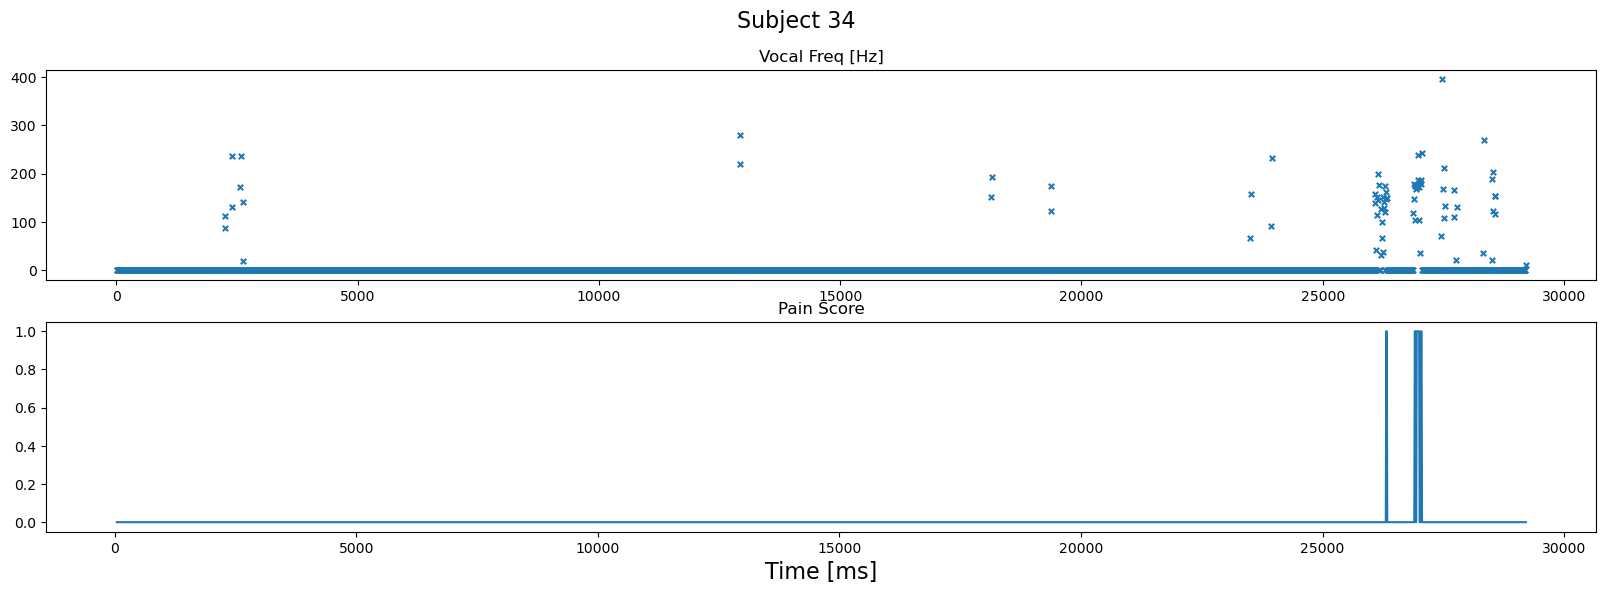

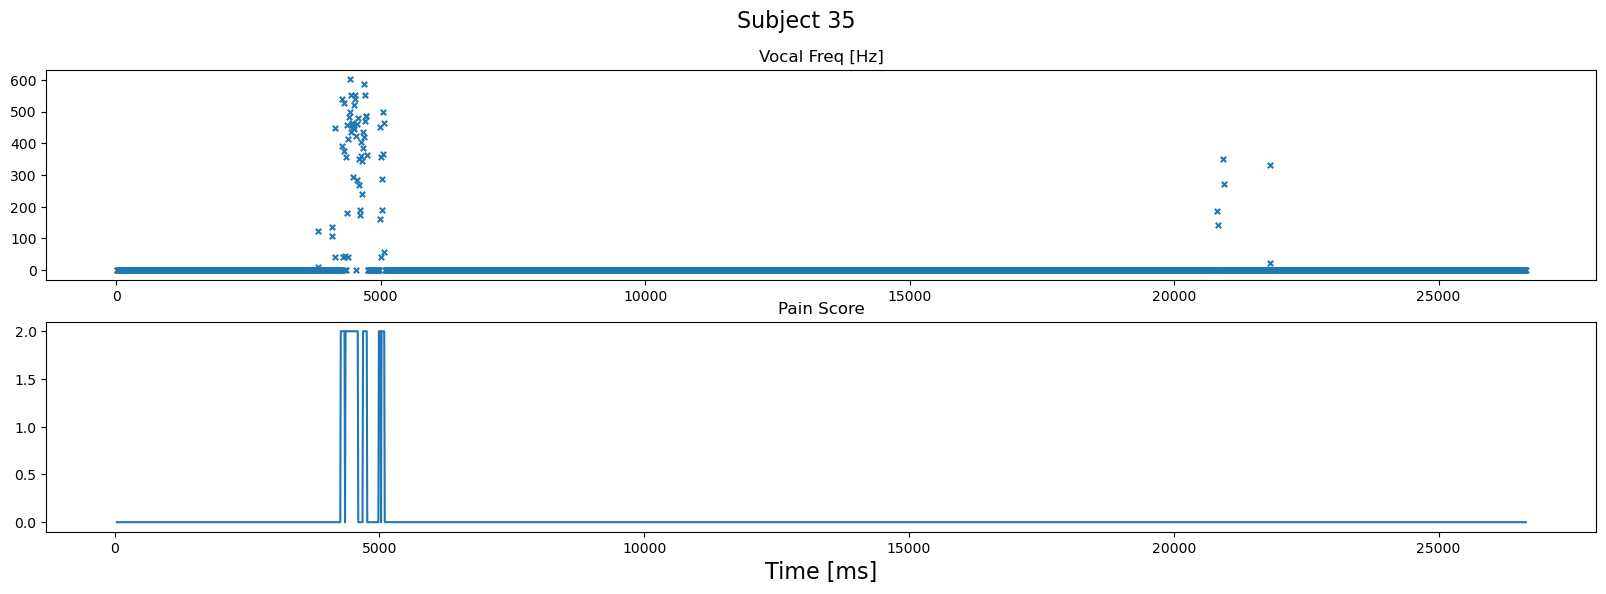

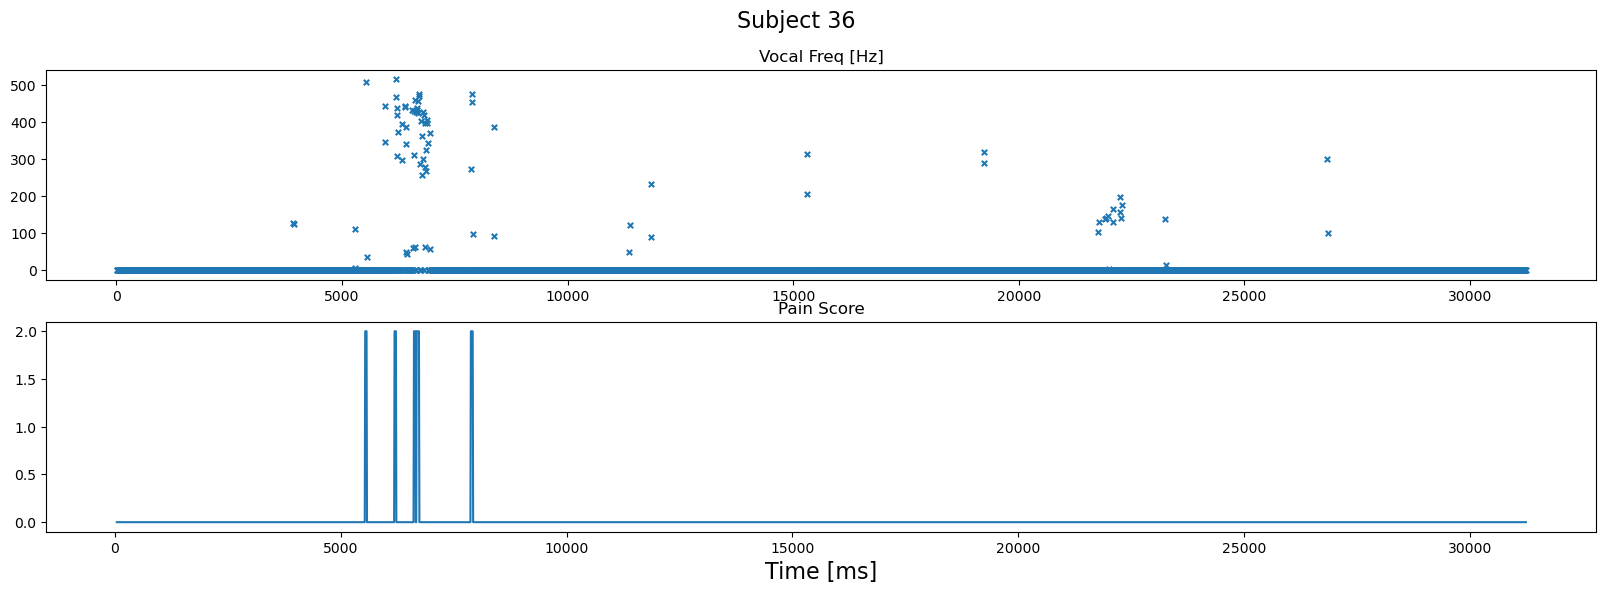

In [5]:
for i in range(1, 37):
    if i == 11: continue # subject 11 does not exist
    main(i)